In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 13.4 MB/s eta 0:00:00


In [ ]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np

<Figure size 1500x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

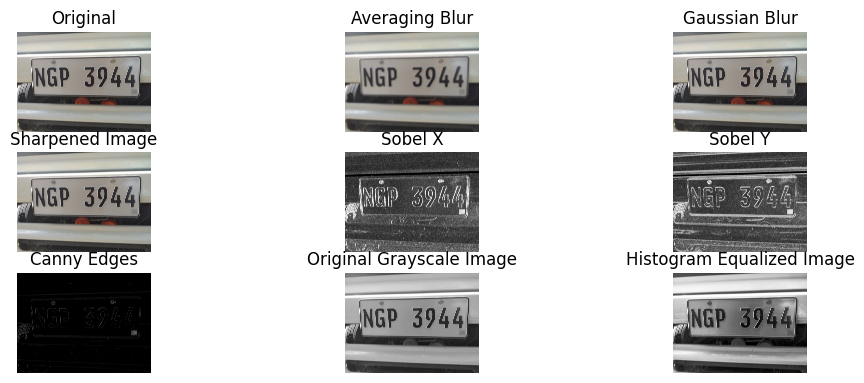

In [ ]:
# Load the image
image_path = '123.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply Averaging filter
blur_avg = cv2.blur(image_rgb, (50, 50))

# Apply Gaussian filter
blur_gaussian = cv2.GaussianBlur(image_rgb, (5, 5), 0)

# Display the images using Matplotlib
plt.figure(figsize=(15, 5))


# Sharpening kernel
kernel_sharpening = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])

# Apply sharpening
sharpened = cv2.filter2D(image_rgb, -1, kernel_sharpening)

# Display the images using Matplotlib
plt.figure(figsize=(10, 5))

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Sobel edge detection
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)  # Horizontal edges
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)  # Vertical edges

# Convert to uint8 (for display)
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)

# Canny edge detection
edges = cv2.Canny(gray, 100, 200)

# Display the images using Matplotlib
plt.figure(figsize=(15, 5))

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(gray_image)

# Display results using Matplotlib
plt.figure(figsize=(12, 6))


# Original Image
plt.subplot(4, 3, 1)
plt.imshow(image_rgb)
plt.title('Original')
plt.axis('off')

# Averaging Blur
plt.subplot(4, 3, 2)
plt.imshow(blur_avg)
plt.title('Averaging Blur')
plt.axis('off')

# Gaussian Blur
plt.subplot(4, 3, 3)
plt.imshow(blur_gaussian)
plt.title('Gaussian Blur')
plt.axis('off')

# Sharpened Image
plt.subplot(4, 3, 4)
plt.imshow(sharpened)
plt.title('Sharpened Image')
plt.axis('off')

plt.subplot(4, 3, 5)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

# Sobel Y
plt.subplot(4, 3, 6)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

# Canny Edges
plt.subplot(4, 3, 7)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')


plt.subplot(4, 3, 8)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(4, 3, 9)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

plt.show()


Original Image

Detected text: 14, Probability: 0.12
Detected text: NGP, Probability: 1.00
Detected text: 3944, Probability: 0.90


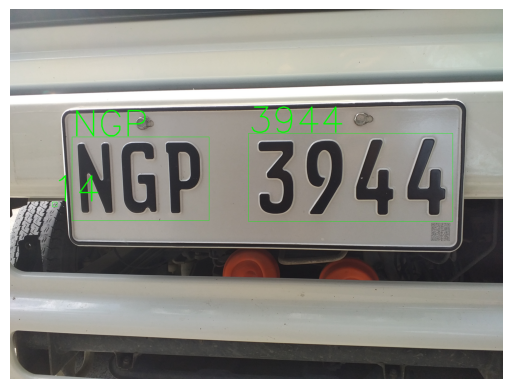

In [ ]:
# Initialize the EasyOCR reader
reader = easyocr.Reader(['en'])  # You can add other languages if needed

# Perform OCR on the image
results = reader.readtext(image_rgb)

# Print detected texts
for (bbox, text, prob) in results:
    print(f'Detected text: {text}, Probability: {prob:.2f}')

# Draw bounding boxes
for (bbox, text, prob) in results:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))

    # Draw rectangle
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

    # Put text label
    cv2.putText(image, text, (top_left[0], top_left[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 10, (0, 255, 0), 10)

# Convert BGR to RGB for displaying
image_rgb_with_boxes = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with detected license plates
plt.imshow(image_rgb_with_boxes)
plt.axis('off')
plt.show()


Averaging Blur

Detected text: NGP, Probability: 0.99
Detected text: 3944, Probability: 1.00


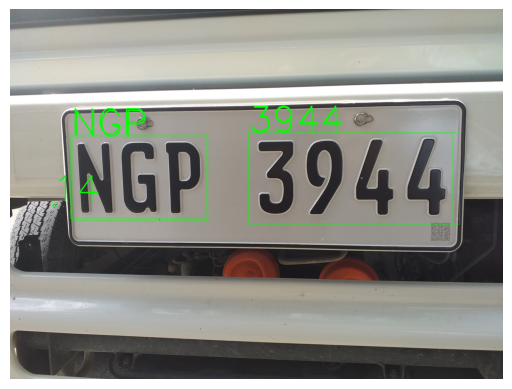

In [ ]:
# Initialize the EasyOCR reader
reader = easyocr.Reader(['en'])  # You can add other languages if needed

# Perform OCR on the image
results = reader.readtext(blur_avg)

# Print detected texts
for (bbox, text, prob) in results:
    print(f'Detected text: {text}, Probability: {prob:.2f}')

# Draw bounding boxes
for (bbox, text, prob) in results:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))

    # Draw rectangle
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

    # Put text label
    cv2.putText(image, text, (top_left[0], top_left[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 10, (0, 255, 0), 10)

# Convert BGR to RGB for displaying
image_rgb_with_boxes = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with detected license plates
plt.imshow(image_rgb_with_boxes)
plt.axis('off')
plt.show()


Gaussian Blur

In [ ]:
# Initialize the EasyOCR reader
reader = easyocr.Reader(['en'])  # You can add other languages if needed

# Perform OCR on the image
results = reader.readtext(blur_gaussian)

# Print detected texts
for (bbox, text, prob) in results:
    print(f'Detected text: {text}, Probability: {prob:.2f}')

# Draw bounding boxes
for (bbox, text, prob) in results:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))

    # Draw rectangle
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

    # Put text label
    cv2.putText(image, text, (top_left[0], top_left[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 10, (0, 255, 0), 10)

# Convert BGR to RGB for displaying
image_rgb_with_boxes = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with detected license plates
plt.imshow(image_rgb_with_boxes)
plt.axis('off')
plt.show()

Detected text: NGP, Probability: 1.00
Detected text: 3944, Probability: 0.81


error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - img is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'img'
>  - img is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'img'


Sharpened Image

Detected text: NGP, Probability: 0.99
Detected text: 3944, Probability: 0.99


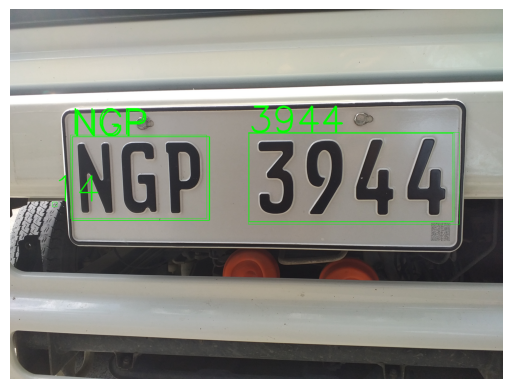

In [ ]:
# Initialize the EasyOCR reader
reader = easyocr.Reader(['en'])  # You can add other languages if needed

# Perform OCR on the image
results = reader.readtext(sharpened)

# Print detected texts
for (bbox, text, prob) in results:
    print(f'Detected text: {text}, Probability: {prob:.2f}')

# Draw bounding boxes
for (bbox, text, prob) in results:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))

    # Draw rectangle
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

    # Put text label
    cv2.putText(image, text, (top_left[0], top_left[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 10, (0, 255, 0), 10)

# Convert BGR to RGB for displaying
image_rgb_with_boxes = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with detected license plates
plt.imshow(image_rgb_with_boxes)
plt.axis('off')
plt.show()

Sobel X

In [ ]:
# Initialize the EasyOCR reader
reader = easyocr.Reader(['en'])  # You can add other languages if needed

# Perform OCR on the image
results = reader.readtext(sharpened)

# Print detected texts
for (bbox, text, prob) in results:
    print(f'Detected text: {text}, Probability: {prob:.2f}')

# Draw bounding boxes
for (bbox, text, prob) in results:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))

    # Draw rectangle
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

    # Put text label
    cv2.putText(image, text, (top_left[0], top_left[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 10, (0, 255, 0), 10)

# Convert BGR to RGB for displaying
image_rgb_with_boxes = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with detected license plates
plt.imshow(image_rgb_with_boxes)
plt.axis('off')
plt.show()